# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

                    Expenditures
Ethnicity                       
Hispanic            11065.569149
White not Hispanic  24697.548628


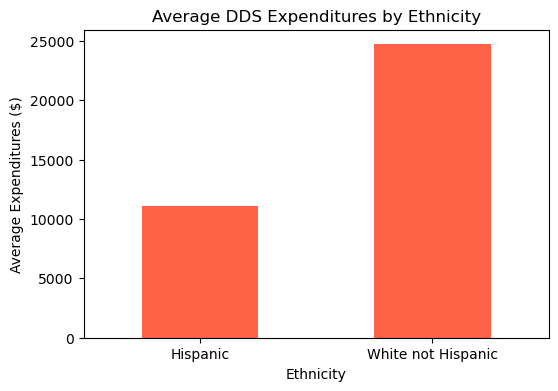

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ca_dds_expenditures.csv')

# Quick preview
df.head()
# print(df.info())


# Calculate average expenditures by ethnicity
table = pd.pivot_table(
    data = df,
    values = 'Expenditures',
    index = 'Ethnicity',
    aggfunc = "mean"
)

# Filter for Hispanic vs White non-Hispanic
ethnic_avg = table.loc[['Hispanic', 'White not Hispanic']]
print(ethnic_avg)

ethnic_avg.plot(kind='bar', figsize=(6,4), legend=False, color=['tomato', 'steelblue'])
plt.title('Average DDS Expenditures by Ethnicity')
plt.ylabel('Average Expenditures ($)')
plt.xticks(rotation=0)
plt.show()

The average expenditures for White non-Hispanic residents are higher than for Hispanic residents. Even when breaking down expenditures by age cohort, the differences persist in most age groups, suggesting a disparity not fully explained. Additionally, the age distribution plot shows that Hispanic residents are disproportionately represented in younger age cohorts, which might partially account for some of the funding gap. However, the consistent differences within age cohorts indicate that systemic allocation differences likely exist, supporting the basis of the lawsuit.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

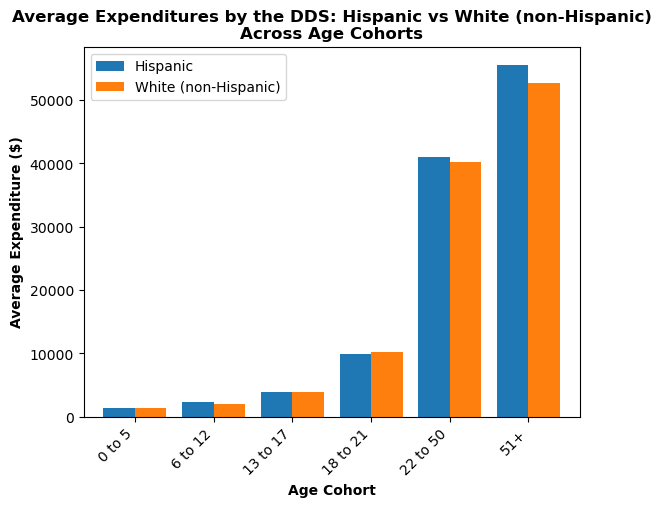

In [8]:
df['AgeStart'] = df['Age Cohort'].str.extract(r'(\d+)').astype(int)

# pivot_eth_age = pd.pivot_table(
#     data = df,
#     values = 'Expenditures',
#     index = 'Age Cohort',
#     columns = 'Ethnicity',
#     aggfunc = 'mean'
# )

# # Focus only on Hispanic vs White not Hispanic
# eth_age_subset = pivot_eth_age[['Hispanic', 'White not Hispanic']]
# print(eth_age_subset)

# eth_age_subset.plot(kind='bar', figsize=(10,6))
# plt.title('Average DDS Expenditures by Age Cohort and Ethnicity')
# plt.ylabel('Average Expenditures ($)')
# plt.xlabel('Age Cohort')
# plt.xticks(rotation=0)
# plt.legend(title='Ethnicity')

# using pivot_table function with aggfunc mean
table = pd.pivot_table(data=df, values='Expenditures', index=['Age Cohort','Ethnicity', 'AgeStart'], aggfunc='mean')

# filter for hispanic and white using xs cross-section
hispanic_values = table.xs('Hispanic', level='Ethnicity')
white_values = table.xs('White not Hispanic', level='Ethnicity')
# print(hispanic_values)

plot_data = pd.DataFrame({
    'Hispanic': hispanic_values['Expenditures'],
    'White (non-Hispanic)': white_values['Expenditures']
}, index=hispanic_values.index).sort_values('AgeStart')

# drop AgeStart index so it won't show on xlabel
plot_data.index = plot_data.index.droplevel('AgeStart')
plot_data.plot(kind='bar', width=0.8)

plt.title('Average Expenditures by the DDS: Hispanic vs White (non-Hispanic)\nAcross Age Cohorts', fontweight='bold')
plt.xlabel('Age Cohort', fontweight='bold')
plt.ylabel('Average Expenditure ($)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

When comparing expenditures within each age cohort, the average allocations for Hispanic and White (non-Hispanic) residents are very similar, and in some cohorts (e.g., 0–5, 6–12, 13–17, 22–50, 51+), Hispanic residents actually receive slightly higher average expenditures. This contradicts the results from Question 1, where overall averages suggested that White (non-Hispanic) residents received substantially more funding than Hispanic residents.

The key reason for this contradiction is age distribution. Hispanic residents are disproportionately represented in younger age cohorts, which have lower average expenditures overall. In Question 1, these younger cohorts pulled down the overall Hispanic average, creating the appearance of a funding gap. When we control for age by examining expenditures within each age cohort, the gap disappears and sometimes even reverses, indicating that age cohort is a confounding variable.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

                     Hispanic  White (non-Hispanic)
Age Cohort AgeStart                                
0 to 5     0               44                    20
6 to 12    6               91                    46
13 to 17   13             103                    67
18 to 21   18              78                    69
22 to 50   22              43                   133
51+        51              17                    66


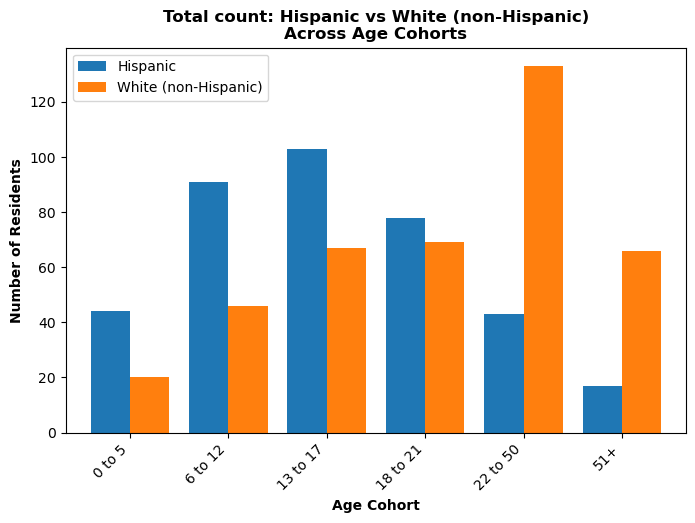

Age Cohort
0 to 5       1415.280488
6 to 12      2226.862857
13 to 17     3922.613208
18 to 21     9888.537688
22 to 50    40209.283186
51+         53521.896226
Name: Expenditures, dtype: float64


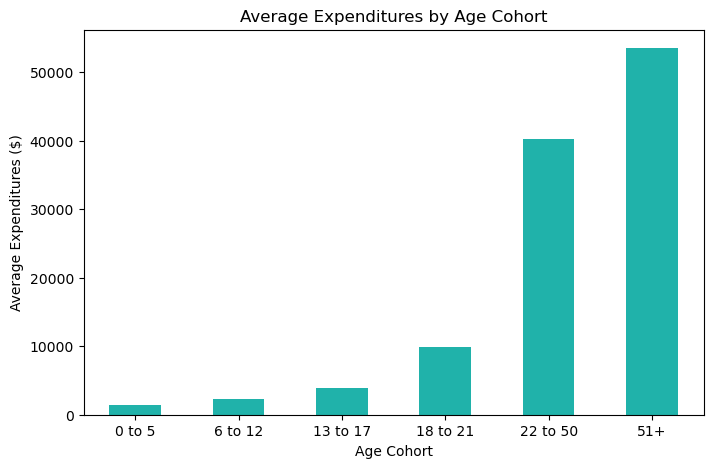

In [9]:
# age_dist = df.groupby(['Ethnicity', 'Age Cohort'])['Id'].count().unstack()
# age_dist = age_dist.loc[['Hispanic', 'White not Hispanic']]

# # # use first int in Age Cohort for sort
# # sort_key = age_dist.index.to_series().str.extract(r'(\d+)').astype(int)[0]
# # age_dist = age_dist.iloc[sort_key.argsort()]

# print(age_dist)

# age_dist.T.plot(kind='bar', figsize=(10,6))
# plt.title('Age Distribution by Ethnicity')
# plt.ylabel('Number of Residents')
# plt.xlabel('Age Cohort')
# plt.xticks(rotation=0)
# plt.legend(title='Ethnicity')
# plt.show()

# change aggfunc to count
table = pd.pivot_table(data=df, values='Expenditures', 
                       index=['Age Cohort','Ethnicity','AgeStart'], 
                       aggfunc='count')

hispanic_values = table.xs('Hispanic', level='Ethnicity')
white_values = table.xs('White not Hispanic', level='Ethnicity')

plot_data = pd.DataFrame({
    'Hispanic': hispanic_values['Expenditures'],
    'White (non-Hispanic)': white_values['Expenditures']
}, index=hispanic_values.index).sort_values('AgeStart')

print(plot_data)

# drop AgeStart index so it won't show on xlabel
plot_data.index = plot_data.index.droplevel('AgeStart')
plot_data.plot(kind='bar', width=0.8, figsize=(8,5))

plt.title('Total count: Hispanic vs White (non-Hispanic)\nAcross Age Cohorts', fontweight='bold')
plt.xlabel('Age Cohort', fontweight='bold')
plt.ylabel('Number of Residents', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

avg_by_age = df.groupby('Age Cohort')['Expenditures'].mean()

# use first int in Age Cohort for sort
sort_key = avg_by_age.index.to_series().str.extract(r'(\d+)').astype(int)[0]
avg_by_age = avg_by_age.iloc[sort_key.argsort()]
print(avg_by_age)

avg_by_age.plot(kind='bar', figsize=(8,5), color='lightseagreen')
plt.title('Average Expenditures by Age Cohort')
plt.ylabel('Average Expenditures ($)')
plt.xlabel('Age Cohort')
plt.xticks(rotation=0)
plt.show()

In Question 1, we found that Hispanic residents received lower average DDS expenditures overall compared to White (non-Hispanic) residents. This suggested a potential funding disparity.

However, in Question 2, when expenditures were compared within each age cohort, the differences between ethnicities largely disappeared - and in some cohorts, Hispanic residents actually received slightly higher average expenditures. This seems contradictory at first, but the age distribution data and age expenditure patterns explain the discrepancy.

The age distribution table shows that Hispanic residents are concentrated in younger age cohorts, while White (non-Hispanic) residents are more heavily represented in older cohorts:

Hispanic: 238 residents are ages 0–17, compared to 133 Whites.

White (non-Hispanic): 199 residents are ages 22+, compared to 60 Hispanics.

At the same time, the average expenditures by age cohort show a dramatic increase with age: from roughly `$1,400` for ages 0–5 to over `$53,000` for the 51+ age group. This means that age is a major driver of expenditures.

Because Hispanic residents are disproportionately younger, their overall average expenditure is pulled downward by the lower funding levels associated with youth. Conversely, White (non-Hispanic) residents are older on average and therefore receive higher funding overall.

Once we control for age by comparing within each age cohort, the ethnic gap vanishes or reverses — revealing that the initial disparity was due to age distribution differences, not necessarily unequal treatment by ethnicity. This is a classic example of Simpson’s paradox, where aggregated data suggest one trend, but disaggregated data reveal a different story.